In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv(r"C:\Users\bajpa\Downloads\PAN+Card+Validation+in+PYTHON+-+Scripts\Udemy_Courses.csv",parse_dates=['published_timestamp'])
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21 23:48:18+00:00,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21 23:44:49+00:00,Musical Instruments


In [4]:
df.dtypes

course_id                            int64
course_title                        object
is_paid                               bool
price                               object
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                    object
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [5]:
df.shape

(3682, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3682 non-null   int64              
 1   course_title         3682 non-null   object             
 2   is_paid              3682 non-null   bool               
 3   price                3682 non-null   object             
 4   num_subscribers      3682 non-null   int64              
 5   num_reviews          3682 non-null   int64              
 6   num_lectures         3682 non-null   int64              
 7   level                3682 non-null   object             
 8   content_duration     3682 non-null   object             
 9   published_timestamp  3682 non-null   datetime64[ns, UTC]
 10  subject              3682 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 291.4+ KB


In [7]:
df.isnull().sum()

course_id              0
course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

<Axes: >

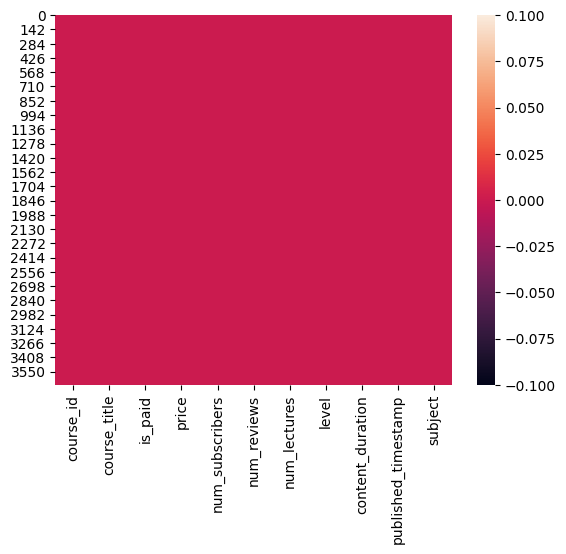

In [9]:
sns.heatmap(df.isnull())

In [8]:
df.duplicated().sum()

6

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
df['subject'].value_counts()

subject
Web Development        1199
Business Finance       1195
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

C:\Users\bajpa\AppData\Roaming\Python\Python311\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


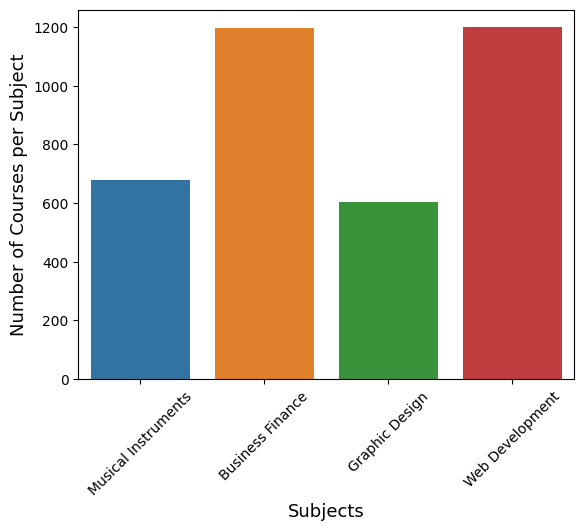

In [13]:
sns.countplot(df['subject'])
plt.xlabel("Subjects",fontsize=13)
plt.ylabel("Number of Courses per Subject",fontsize=13)
plt.xticks(rotation = 45)
plt.show()

In [14]:
df['level'].value_counts()

level
All Levels            1928
Beginner Level        1269
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

C:\Users\bajpa\AppData\Roaming\Python\Python311\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


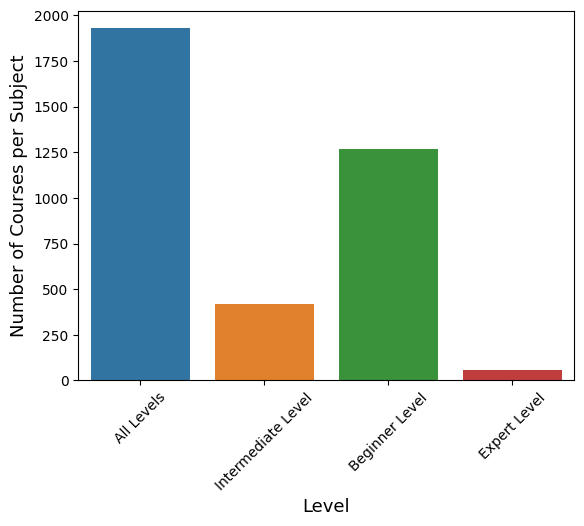

In [16]:
sns.countplot(df['level'])
plt.xlabel("Level",fontsize=13)
plt.ylabel("Number of Courses per Subject",fontsize=13)
plt.xticks(rotation = 45)
plt.show()

In [17]:
df['is_paid'].value_counts()

is_paid
True     3366
False     310
Name: count, dtype: int64

C:\Users\bajpa\AppData\Roaming\Python\Python311\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


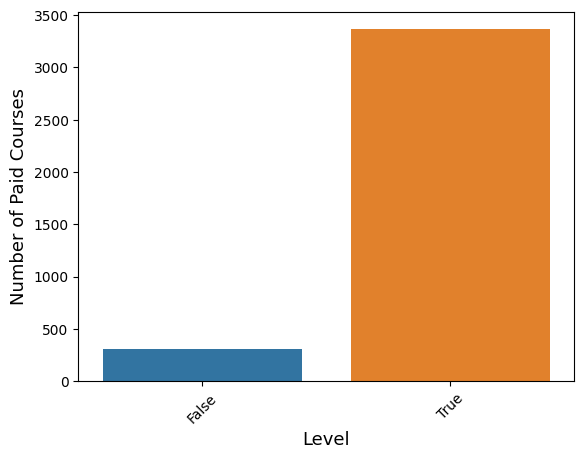

In [18]:
sns.countplot(df['is_paid'])
plt.xlabel("Level",fontsize=13)
plt.ylabel("Number of Paid Courses",fontsize=13)
plt.xticks(rotation = 45)
plt.show()

In [20]:
df.groupby(['is_paid']).mean(numeric_only=True)

,course_id,num_subscribers,num_reviews,num_lectures
is_paid,,,,
False,691446.970968,11533.951613,425.929032,21.416129
True,675165.977718,2418.997623,131.364231,41.816993


<Axes: xlabel='is_paid', ylabel='num_subscribers'>

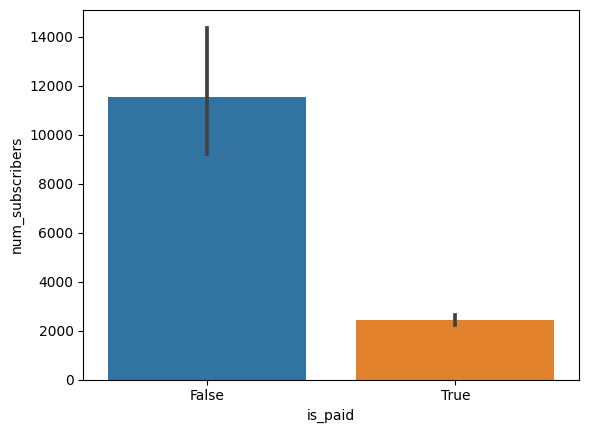

In [21]:
sns.barplot(x="is_paid", y="num_subscribers",data=df)

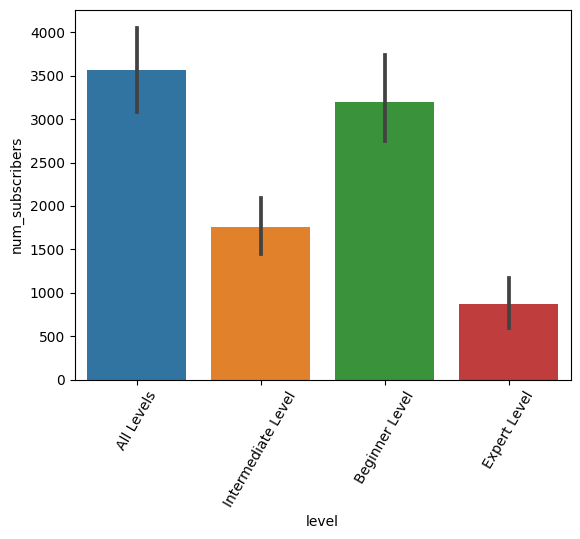

In [24]:
sns.barplot(x="level", y="num_subscribers",data=df)
plt.xticks(rotation = 60)
plt.show()

In [29]:
df[df['num_subscribers'].max() == df['num_subscribers']]['course_title']

2230    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

In [32]:
top_10 = df.sort_values(by="num_subscribers",ascending=False).head(10)

<Axes: xlabel='num_subscribers', ylabel='course_title'>

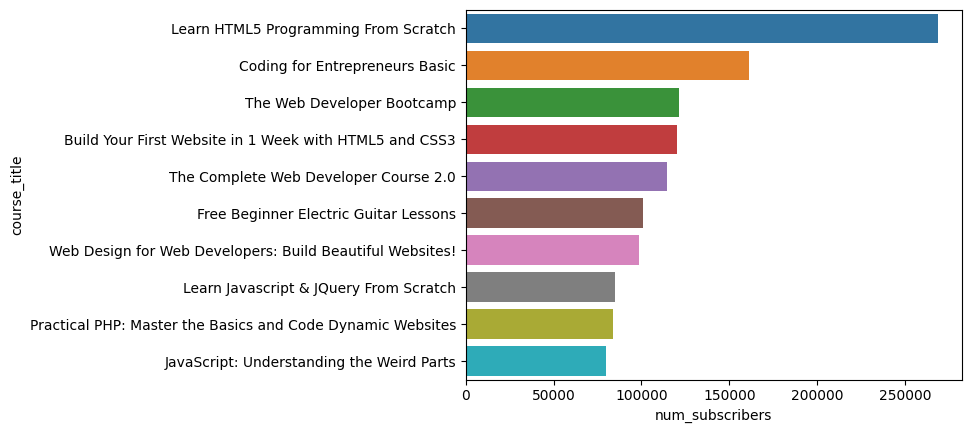

In [33]:
sns.barplot(x="num_subscribers",y="course_title",data=top_10)

<Axes: xlabel='subject', ylabel='num_reviews'>

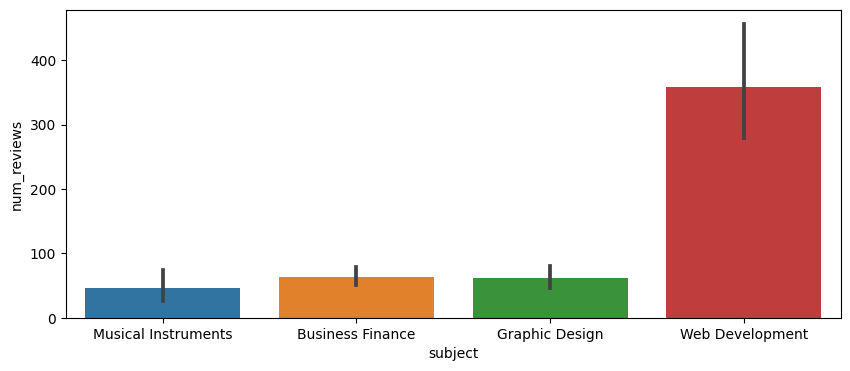

In [35]:
plt.figure(figsize=(10,4))
sns.barplot(x="subject",y="num_reviews",data=df)

<Axes: xlabel='price', ylabel='num_reviews'>

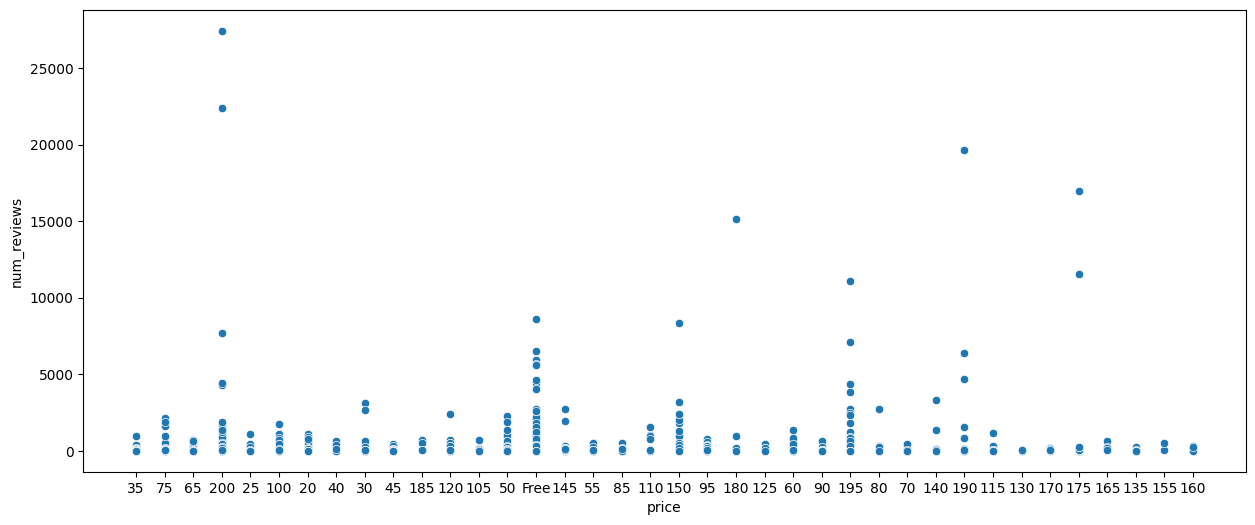

In [37]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="price",y="num_reviews",data=df)

In [40]:
len(df[df['course_title'].str.contains('python',case=False)])

29

In [44]:
python = df[df['course_title'].str.contains('python',case=False)].sort_values(by="num_subscribers",ascending = False).head(10)

In [45]:
python

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3573,16646,Web Programming with Python,True,50,35267,217,53,All Levels,4 hours,2012-04-25 00:01:43+00:00,Web Development
777,47963,"Coding for Entrepreneurs: Learn Python, Django...",True,195,23412,799,251,All Levels,45 hours,2013-04-08 00:46:14+00:00,Web Development
2294,391546,Learn Python and Django: Payment Processing,True,70,17714,198,23,All Levels,3.5 hours,2015-02-09 15:37:56+00:00,Web Development
2955,822444,Python and Django Full Stack Web Developer Boo...,True,200,11832,1883,191,All Levels,31.5 hours,2017-02-24 18:40:55+00:00,Web Development
1400,394832,Fun and creative web engineering with Python a...,False,Free,10917,319,25,All Levels,2 hours,2015-06-09 19:51:50+00:00,Web Development
3272,938560,The Complete Ethical Hacking Course 2.0: Pytho...,True,195,7827,268,66,All Levels,11 hours,2016-09-26 15:08:29+00:00,Web Development
814,631128,Complete Python Web Course: Build 8 Python Web...,True,110,7489,941,173,All Levels,16 hours,2015-11-08 20:57:35+00:00,Web Development
3460,76052,Try Django 1.9 | Build a Blog and Learn Python...,True,50,7407,172,147,All Levels,20 hours,2014-03-04 07:12:21+00:00,Web Development
2956,477702,Python for Beginners: Python Programming Langu...,True,150,6153,125,84,Beginner Level,5 hours,2015-06-14 18:18:57+00:00,Web Development
3013,970600,REST APIs with Flask and Python,True,110,5151,737,115,Intermediate Level,12.5 hours,2016-11-06 19:00:38+00:00,Web Development


<Axes: xlabel='num_subscribers', ylabel='course_title'>

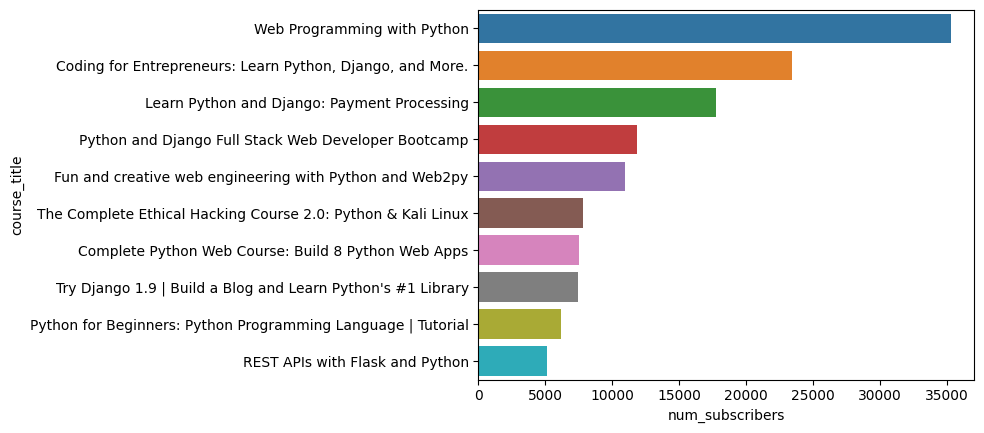

In [46]:
sns.barplot(x="num_subscribers",y="course_title",data=python)

In [48]:
df['Year']  = df['published_timestamp'].dt.year

In [49]:
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18 05:07:05+00:00,Musical Instruments,2014
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12 19:06:34+00:00,Musical Instruments,2017
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26 18:34:57+00:00,Musical Instruments,2017
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21 23:48:18+00:00,Musical Instruments,2017
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21 23:44:49+00:00,Musical Instruments,2017


C:\Users\bajpa\AppData\Roaming\Python\Python311\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Year', ylabel='count'>

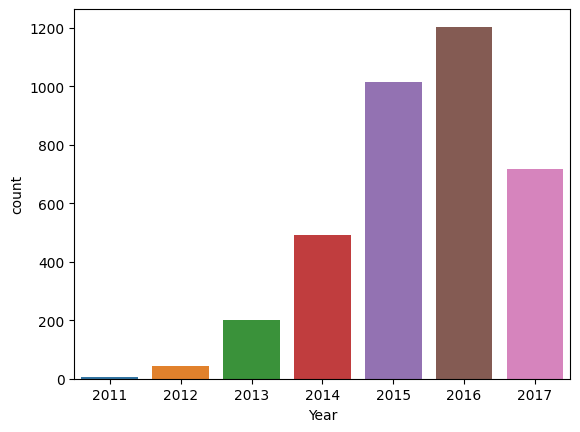

In [50]:
sns.countplot('Year',data=df)

In [51]:
df.groupby('Year')['subject'].value_counts()

Year  subject            
2011  Web Development          5
2012  Web Development         19
      Musical Instruments     10
      Graphic Design          10
      Business Finance         6
2013  Business Finance        84
      Web Development         55
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          65
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       347
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       227
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: count, dtype: int64